## import libraries and collect data

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
iris = load_iris()

## Analyze data

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df["target_name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
df2 = df[df["target"] == 2]

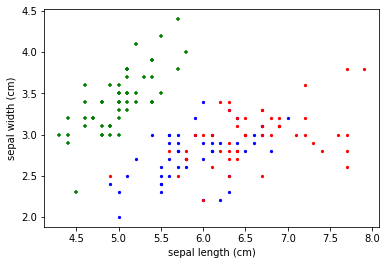

In [8]:
ax = df0.plot.scatter("sepal length (cm)", "sepal width (cm)", marker='+', color="green")
ax = df1.plot.scatter("sepal length (cm)", "sepal width (cm)", marker='.', color="blue", ax=ax)
ax = df2.plot.scatter("sepal length (cm)", "sepal width (cm)", marker='.', color="red", ax=ax)

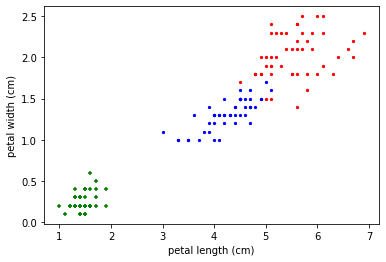

In [9]:
ax = df0.plot.scatter("petal length (cm)", "petal width (cm)", marker='+', color="green")
ax = df1.plot.scatter("petal length (cm)", "petal width (cm)", marker='.', color="blue", ax=ax)
ax = df2.plot.scatter("petal length (cm)", "petal width (cm)", marker='.', color="red", ax=ax)

## Create model

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
X = df.drop(["target", "target_name"], axis="columns")
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
len(X_train)

120

In [13]:
len(X_test)

30

In [15]:
mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluate model

In [16]:
mymodel.score(X_test, Y_test)

0.9666666666666667

In [18]:
Y_predicted = mymodel.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  8]], dtype=int64)

Text(33.0, 0.5, 'Truth')

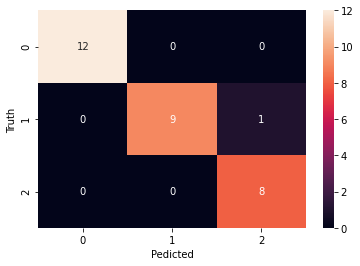

In [21]:
sns.heatmap(cm, annot=True)
plt.xlabel("Pedicted")
plt.ylabel("Truth")

In [23]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

